In [207]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
import plotting
import importlib
importlib.reload(plotting)
pd.options.display.max_rows = 4000



# Load in all depth vs resistance curves into a dataframe list

In [208]:
def load_data(data_src):
    depth_resist_curve_df_list = [] # used for plotting
    filename_list = []
    for filename in os.listdir(data_src):
        df = pd.read_csv(f"{data_src}/{filename}")
        depth_resist_curve_df_list.append(df)
        filename_list.append(filename)
    return depth_resist_curve_df_list, filename_list

data_src = "data/cleaned_data"
depth_resist_curve_df_list, filename_list = load_data(data_src)
filename_to_depth_resist = dict(zip(filename_list, depth_resist_curve_df_list))

In [209]:
data_features_df = pd.read_csv("data/features.csv")
clustering_features_df = plotting.extract_numerical_features(data_features_df)

# K-Means Clustering Implementation w/ k-means++ initialization for centroids

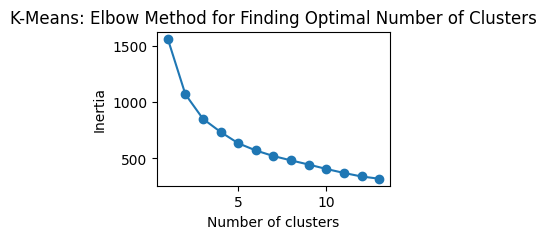

In [210]:
inertias = []
for k in range(1,14):
    kmeans = KMeans(n_clusters=k, init="k-means++", n_init=100).fit(clustering_features_df)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(3,2))
plt.plot(range(1,14), inertias, marker='o')
plt.title("K-Means: Elbow Method for Finding Optimal Number of Clusters")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.grid=True
plt.show()

# K-Means Clustering
- assumes
    - spherical clusters (isotropic)
    - similar size clusters (equal variance)
    - features are on same scale
    - clusters are linearly separable
    - number of clusters (k) is known

defaultdict(<class 'list'>, {0: [3, 31, 58, 49], 1: [70, 4, 13, 42], 2: [73, 21, 2], 3: [20, 39, 71], 4: [33], 5: [18, 75, 9, 1, 56, 77, 43], 6: [41, 65]})
label: 0
              filenames popcorn  clump  flake plates
3    WS23_L3_T1_P_1.csv    True  False  False  False
31   WS23_L3_T1_P_5.csv    True  False  False  False
58  WS23_L3_T1_P_19.csv   False  False   True   True
49  WS23_L3_T1_P_14.csv   False   True  False  False
label: 1
              filenames popcorn  clump  flake plates
70  WS23_L3_T1_P_17.csv   False   True  False  False
4    WS23_L3_T1_P_8.csv    True  False  False  False
13  WS23_L3_T1_P_18.csv   False  False  False   True
42  WS23_L3_T1_P_15.csv   False   True  False  False
label: 2
              filenames popcorn  clump  flake plates
73  WS23_L3_T1_P_20.csv   False  False   True  False
21  WS23_L3_T1_P_16.csv   False   True   True  False
2    WS23_L3_T1_P_6.csv    True  False  False  False
label: 3
              filenames popcorn  clump flake plates
20  WS23_L3_T1

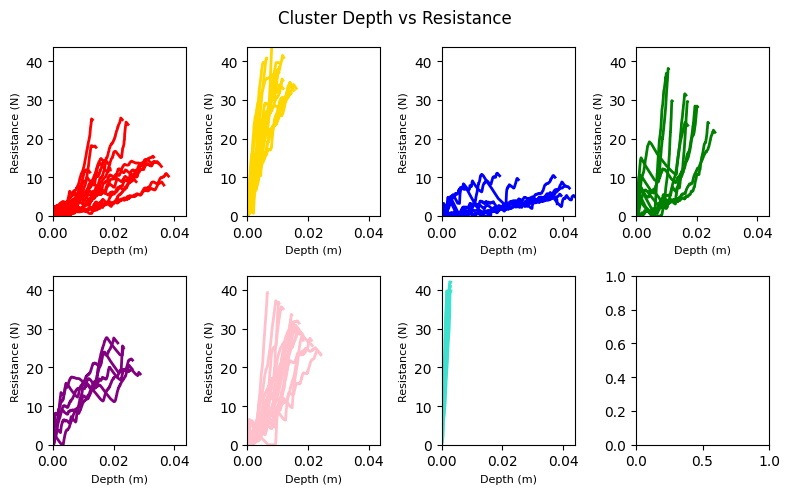

In [211]:
kmeans_elbow = 7
kmeans = KMeans(n_clusters=kmeans_elbow, init="k-means++", n_init=100).fit(clustering_features_df)
# print(f"kmeans cluster centers: {kmeans.cluster_centers_}")
# plotting.pca_analysis(clustering_features_df) # printing scree plot
# plotting.plot_clusters_together(kmeans.labels_, "kmeans")
# plotting.plot_clusters_seperately(kmeans.labels_, clustering_features_df.index.tolist(), depth_resist_curve_df_list, data_features_df, "kmeans")

# for each label
    # print out the surface visual features for each

loc3_idxs = [18,20,73,21,39,41,70,71,75,2,3,9,31,33,58,1,4,49,56,65,77,13,42,43]
data_features_df = data_features_df.loc[loc3_idxs]
clusters_mapped_idxs = plotting.map_cluster_to_idx(kmeans.labels_, data_features_df.index)
print(clusters_mapped_idxs)
for label, label_idxs in clusters_mapped_idxs.items():
    print(f'label: {label}')
    print(data_features_df.loc[label_idxs][['filenames', 'popcorn', 'clump', 'flake', 'plates']])

plotting.plot_unsupervised_cluster_subplots(pd.Series(kmeans.labels_), depth_resist_curve_df_list, "kmeans")
plotting.plot_pca(clustering_features_df, y_labels=kmeans.labels_, num_pc=3, graph_title="kmeans",)

# Hierarchical Clustering

In [212]:

# if distance_threshold != None then n_clusters = None
hierarchical = AgglomerativeClustering(distance_threshold=None, n_clusters=8)
hierarchical.fit(clustering_features_df)
linkage = "Ward"
plotting.plot_unsupervised_cluster_subplots(hierarchical.labels_, clustering_features_df.index.tolist(), depth_resist_curve_df_list, data_features_df, 'hierarchical')
plotting.plot_pca(clustering_features_df, y_labels=hierarchical.labels_, num_pc=3, graph_title="hierachical")


TypeError: cannot concatenate object of type '<class 'int'>'; only Series and DataFrame objs are valid

# DBSCAN

In [ ]:

# eps=0.7, min_samples=3 works very well
# dbscan = DBSCAN(eps=1.8, min_samples=10).fit(clustering_features_df)
# cleaned_db_labels = [label if label != -1 else max(dbscan.labels_)+1 for label in dbscan.labels_]
# # get_curve_idx_from_cluster_color("yellow", cleaned_db_labels)
# plotting.plot_pca(clustering_features_df, cleaned_db_labels, num_pc=3, graph_title='dbscan')
# plotting.plot_clusters_seperately(cleaned_db_labels, clustering_features_df.index.to_list(), depth_resist_curve_df_list)